# Curso OPenNDAP con Python
## Contenido

- [Herramientas](#Herramientas)
- [Librerías](#Librerías)
- [Datos](#Datos)
- [Explorando los datos con xarray](#Explorando-los-datos-con-xarray)
- [Seleccionando los datos](#Seleccionando-los-datos)
- [Gráficas](#Gráficas)
- [Operaciones Básicas con xarray](#Operaciones-Básicas-con-xarray)
- [Interpolación](#Interpolación)

# Herramientas
[OPeNDAP](https://www.opendap.org/) Es un acrónimo para "Open-source Project for a Network Data Access Protocol", un protocolo de acceso a datos científicos que pueden ser procesados con xarray.


[Pydap](https://www.pydap.org/en/latest/) Es una librería de Python que implementa el protocolo de acceso a OPeNDAP.

[Numpy](https://numpy.org/) Es una librería de python para realizar cálculos científicos.

[Pandas](https://pandas.pydata.org/) Es una liberría de python para manipulación de datos en forma de tabla por medio de etiquetas e índices.

[xarray](https://docs.xarray.dev/en/stable/) es una librería de Python que permite trabajar con arreglos de datos multidimensionales en formato nedcdf:

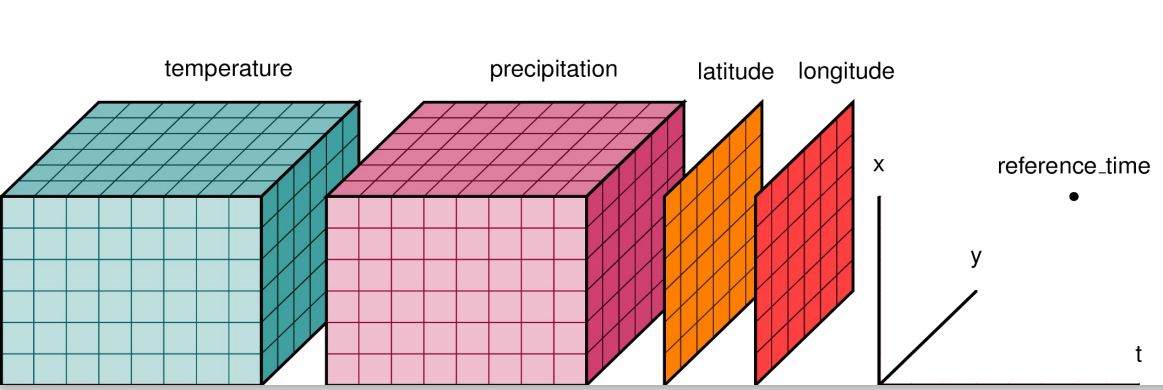

- xarray introduce etiquetas en la forma de dimensiones, coordinadas y atributos sobre arrays tipo NumPy.
- Permite aplicar una serie de operaciones matemáticas sobre los datos.
- Seleccionar variables por nombre.
- Dividir o reagrupar datos 
- Posee soporte para el análisis de datos en remoto via OpenDAP



# Librerías

Vamos a utilizar `xarray`, `pydap`, `numpy`, `pandas`,`datetime`

In [1]:
import xarray as xr
from pydap.cas.get_cookies import setup_session
from pydap.client import open_url
from datetime import datetime
import numpy as np
import pandas as pd

# Datos
Ahora nos conectaremos a CMENS y accederemos a ciertos datos.Para esto, necesitamos un perfil en cmems con nombre de usuario y password y el url de los datos.

In [2]:
url = "https://my.cmems-du.eu/thredds/dodsC/cmems_mod_ibi_wav_my_0.05deg-2D_PT1H-i"
username = "***" 
password = "***"

Una vez creado el perfil, podemos acceder a los datos, para esto utilizamos la función `setup_session` de `pydap` para iniciar sesión con nuestro nombre de usuario y password y luego accedemos a los datos en formato nedcf con la función `PydapDataStore` de xarray. Por último, abrimos el dataset con `open_dataset`.

In [3]:
print('Iniciando sesión')
cas_url = "https://cmems-cas.cls.fr/cas/login"
session = setup_session(cas_url, username, password)
session.cookies.set("CASTGC", session.cookies.get_dict()["CASTGC"])

print('Accediendo a los datos')
data_store = xr.backends.PydapDataStore(open_url(url, session=session))
ds = xr.open_dataset(data_store)
ds

Iniciando sesión
Accediendo a los datos


<xarray.Dataset>
Dimensions:    (latitude: 601, longitude: 481, time: 254184)
Coordinates:
  * latitude   (latitude) float32 26.0 26.05 26.1 26.15 ... 55.9 55.95 56.0
  * longitude  (longitude) float32 -19.0 -18.95 -18.9 -18.85 ... 4.9 4.95 5.0
  * time       (time) datetime64[ns] 1993-01-01 ... 2021-12-30T23:00:00
Data variables: (12/17)
    VHM0       (time, latitude, longitude) float32 ...
    VHM0_SW1   (time, latitude, longitude) float32 ...
    VHM0_SW2   (time, latitude, longitude) float32 ...
    VHM0_WW    (time, latitude, longitude) float32 ...
    VMDR       (time, latitude, longitude) float32 ...
    VMDR_SW1   (time, latitude, longitude) float32 ...
    ...         ...
    VTM01_SW1  (time, latitude, longitude) float32 ...
    VTM01_SW2  (time, latitude, longitude) float32 ...
    VTM01_WW   (time, latitude, longitude) float32 ...
    VTM02      (time, latitude, longitude) float32 ...
    VTM10      (time, latitude, longitude) float32 ...
    VTPK       (time, latitude, longitude) float32 ...
Attributes: (12/19)
    Conventions:    CF-1.0
    institution:    Nologin-Puertos del Estado-MeteoFrance
    title:          CMEMS IBI MULTI-YEAR REANALYSIS: HOURLY WAVE PRODUCTS
    easting:        longitude
    northing:       latitude
    references:     http://marine.copernicus.eu/
    ...             ...
    latitude_min:   26.f
    latitude_max:   56.f
    z_min:          0.0f
    z_max:          0.0f
    contact:        mailto: servicedesk.cmems@mercator-ocean.eu
    source:         IBI-MFC (Operational Production Center)

El data set contiene múltiples arrays multidimensionales (variables) y metadata.

# Explorando los datos con xarray

In [ ]:
#get information about the coordinates
ds.coords
#get information about the variables
ds.var

## Seleccionando los datos

In [ ]:
#select a variable like in a dictionary
VHM0 = ds['VHM0']

In [ ]:
#index space
VHM0.isel(time=-1)
VHM0.isel(time=0)
VHM0[0,:,:]
#VHM0[0,:,0].values

In [ ]:
# selecting values using vectorized index
VHM0[[0,10],[0,1],[0,20]]

In [ ]:
#check which axis is a coordinate
VHM0.get_axis_num("latitude")

In [ ]:
#label space
VHM0.sel(time='1993-01-01T00:00:00.000000000')
VHM0.loc['1993-01-01T00:00:00.000000000', :, :]
VHM0.sel(latitude=26)
VHM0.loc[:, 26, :]

In [ ]:
# Select a variable and make temporal subset
subset_ds = ds.get("VHM0")
subset_ds = subset_ds.sel(time=slice(datetime(1999,1,1), datetime(1999,2,1)))
subset_ds

El método sel() posee los argumentos ''method'' y ''tolerance'' que permiten la búsqueda de vecinos cercanos.

In [ ]:
VHM0.sel(time=['2021-12-20T23:00:00','2021-12-30T23:00:00'], method="nearest", tolerance=0.2)
VHM0.sel(latitude=[26,31], method="nearest", tolerance=0.2)

# Operaciones Básicas con xarray

https://www.youtube.com/watch?v=TSw3GF_d2y8&list=PLNemzZpJM7lUu_iGP_lA2m7SeSUwKSIvR

Interpolation,...,Resample, Rolling, Coarsen https://earth-env-data-science.github.io/lectures/xarray/xarray-part2.html

In [ ]:
# Check if values are in array
VHM0[0,0:10,0].isin([1.55,1.56, 1.57,1.58])

In [ ]:
#choose an small subset of one the variable to test the operations
subset= VHM0[0:10,0:10,0:10]

In [ ]:
#substraction
#subset -5

In [ ]:
#np.sin(subset)

In [ ]:
#xr.where(subset > 0, "positive", "negative")

In [ ]:
#matrix multiplication
#subset @ subset

In [ ]:
#subset.round(2)

In [ ]:
#missing values
#subset.isnull()

In [ ]:
#Aggregation
#subset.sum(dim="latitude")

In [ ]:
#subset.get_axis_num("latitude")

In [ ]:
#subset.mean()

In [ ]:
# Rolling window operations
#subset.rolling(latitude=1)

In [ ]:
#resampling
monthly=subset.resample(time="M").mean()
monthly.plot()

In [ ]:
subset[0,:,:].plot()

## Interpolación

# Gráficas

In [ ]:
# 3D plot
VHM0.sel(time='2021-12-30T23:00:00').plot()

In [ ]:
# 2D Plot: variable vs time
VHM0[0:100,0,0].plot()

In [ ]:
# 2D Plot: variable vs Longitude
VHM0[0,0,:].plot()

In [ ]:
# 2D Plot: variable vs Latitude
VHM0[0,:,0].plot()

In [ ]:
# Write netcdf
VHM0[0,0:10,0:10].to_netcdf("VHM0.nc")
VHM0[0,0:10,0:10]

In [ ]:
VHM0[0,0:10,0:10]

In [ ]:
df=VHM0[0,0:10,0:10].to_dataframe()
df

Aparición de NaN's: no hay un valor asignado de la variable en cuestion para cada posible combinacion de coordenadas. Esto sucede cuando se pasa de una tabla a cubo.

In [ ]:
# Export to other formats... 
df.to_csv("VHM0.csv")
df.to_html("VHM0.html")

# Check arguments in libraries docuemntation for more options...
df.to_json("VHM0.json", orient="records", indent=4)